#Homework 2

This homework will give you some practice with using and interpreting the Discrete Fourier Transform, and with using correlation to identify signals. In each question you will proess some files that are stored in Gitlab and linked from this notebook. You will manually download the files to your computer and then do a File Choosing step to upload them into the Colab environment. (Extra credit opportunity: improve the data upload process to eliminate the manual data upload steps.)

##Q1 Using and interpreting the Fourier Transform
Download and uncompress the zipfile https://gitlab.cs.washington.edu/jrs/cse490w/-/blob/master/Signals.zip. If you have a permission error, go to gitlab.cs.washington.edu, log in, and then try again to download the file. Once the file contents are visible in a browser window, you can download it to save it locally as a comma separated value (csv) file. On the right side of the window where the file contents are shown, at the same height as the filename, is a download link that you can use to save the file contents locally.  The code below will load a signal from this file into the variable "loadeddata". (You have to do a manual file selection prompt. Note that the filename has to be exactly "mysterysignal200sps.csv" or the upload won't succeed.

1a [4 points] The signal is sampled at 200 samples per second. Plot the time domain signal, with the horizontal axis properly labeled with actual times at which the samples occured.

1b [6 points] Plot the magnitude of the Discrete Fourier transform of this signal, using Numpy's fft routine. Make sure that the horizontal axis is properly labeled with actual frequencies. Remember to use fftshift or the horizontal axis won't be easily interpreted. Also remember that the frequency scale is determined by the sampling rate (which again is 200 samples per second).

1c [4 points] The signal contains two main frequencies, which should be visible in the Fourier Transform plot. What are the two frequencies?

1d [4 points] Why does the DFT plot have 4 peaks instead of just 2?



In [ ]:
# HW2
%matplotlib inline
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [ ]:
dfloaded = pd.read_csv('https://raw.githubusercontent.com/micbrahim/493W/master/hw2/Signals/mysterysignal200sps.csv', sep=',')
loadeddata = dfloaded.iloc[:,1]

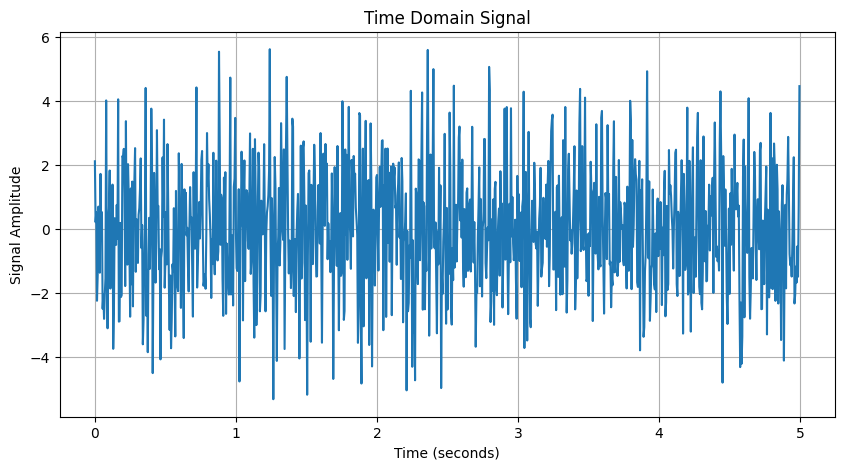

In [ ]:
# Sampling rate
sampling_rate = 200  # samples per second

# Create a time array corresponding to each sample
time = pd.Series(range(len(loadeddata))) / sampling_rate

# Plot the time-domain signal
plt.figure(figsize=(10, 5))
plt.plot(time, loadeddata)
plt.title('Time Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.grid(True)
plt.show()

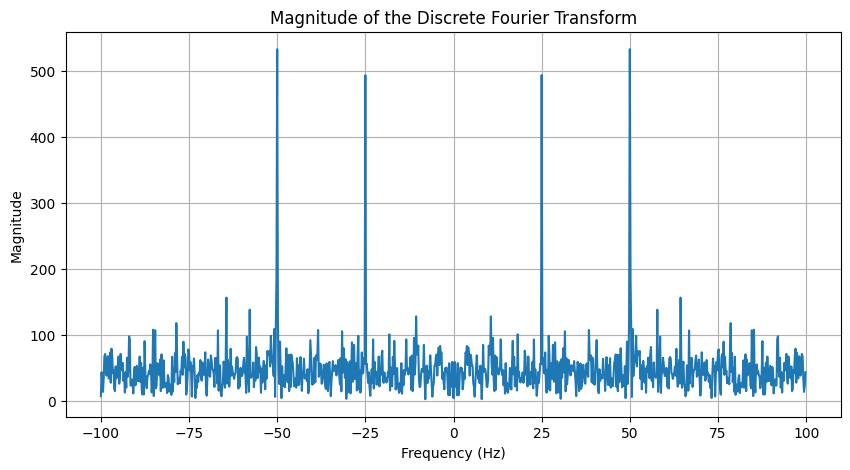

In [ ]:
# Compute the Discrete Fourier Transform (DFT) of the signal
fft_signal = np.fft.fft(loadeddata)
fft_shifted = np.fft.fftshift(fft_signal)

# Calculate the magnitude of the FFT
magnitude = np.abs(fft_shifted)

# Generate frequency axis for plotting
n = len(loadeddata)
frequency = np.fft.fftshift(np.fft.fftfreq(n, d=1/sampling_rate))

# Plot the magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequency, magnitude)
plt.title('Magnitude of the Discrete Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

25, 50 Hz

When you calculate the DFT of a real-valued signal, the result has 4 values because the complex exponentials used in the DFT have conjugate symmetry.

##Q2 Catching Crooks with Correlation

The fingerprint in the file "fingerprinttest.csv" was discovered at the scene of the crime. You also have a database of 4 fingerprints from known criminals, with filenames "fingerprint1.csv" etc. Download the 5 fingerprints from the same gitlab directory as above (for example
https://gitlab.cs.washington.edu/jrs/cse490w/-/blob/master/fingerprinttest.csv) onto your local computer.  Then using the code snippets below, load the various fingerprints into the Colab environment.

2a [6 points] Plot all of the fingerprints (don't worry about putting anything special on the horizontal axis...just the default of sample numbers if fine).

2b [4 points] Can you tell by examining the plots which fingerprint from the database matches the fingerprint from the crime scene? Why/why not? (I am just looking for an additional sentence of commentary in addition to yes/no.)

2c [8 points] Compute the correlation of the fingerprint taken from the scene of the crime with each of the fingerprints in the database.

2d [2 points] Based on these correlation results, which of the 4 people in the database is the most likely match with the fingerprint from the crime scene?

In [ ]:
dfldt = pd.read_csv('https://raw.githubusercontent.com/micbrahim/493W/master/hw2/Signals/fingerprinttest.csv',sep=',')
fingerprinttest = dfldt.iloc[:,1]

In [ ]:
dfld1 = pd.read_csv('https://raw.githubusercontent.com/micbrahim/493W/master/hw2/Signals/fingerprint1.csv',sep=',')
fingerprint1 = dfld1.iloc[:,1]

In [ ]:
dfld2 = pd.read_csv('https://raw.githubusercontent.com/micbrahim/493W/master/hw2/Signals/fingerprint2.csv',sep=',')
fingerprint2 = dfld2.iloc[:,1]

In [ ]:
dfld3 = pd.read_csv('https://raw.githubusercontent.com/micbrahim/493W/master/hw2/Signals/fingerprint3.csv',sep=',')
fingerprint3 = dfld3.iloc[:,1]

In [ ]:
dfld4 = pd.read_csv('https://raw.githubusercontent.com/micbrahim/493W/master/hw2/Signals/fingerprint4.csv',sep=',')
fingerprint4 = dfld4.iloc[:,1]

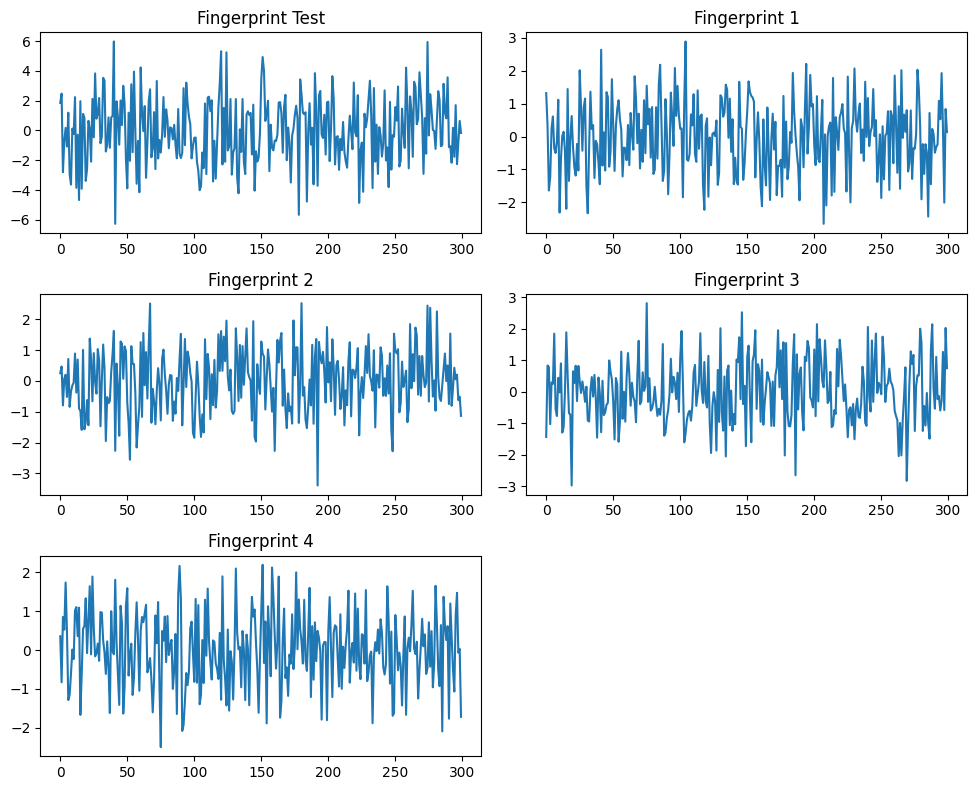

In [ ]:
# Plot each fingerprint
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(fingerprinttest)
plt.title('Fingerprint Test')

plt.subplot(3, 2, 2)
plt.plot(fingerprint1)
plt.title('Fingerprint 1')

plt.subplot(3, 2, 3)
plt.plot(fingerprint2)
plt.title('Fingerprint 2')

plt.subplot(3, 2, 4)
plt.plot(fingerprint3)
plt.title('Fingerprint 3')

plt.subplot(3, 2, 5)
plt.plot(fingerprint4)
plt.title('Fingerprint 4')

plt.tight_layout()
plt.show()


In [ ]:
def normalize(fingerprint):
  return fingerprint/np.sqrt(np.dot(fingerprint,fingerprint))

fingerarr = [normalize(fingerprint1), normalize(fingerprint2), normalize(fingerprint3), normalize(fingerprint4)]

maxcorr = 0
for i, finger in enumerate(fingerarr):
  corr = np.abs(np.dot(normalize(fingerprinttest), finger))
  if corr > maxcorr:
    maxcorr = corr
    maxfingern = finger
    maxfingeri = i + 1

print("The person in the database which is the most likely match with the fingerprint from the crime scene is person number " + str(maxfingeri))

The person in the database which is the most likely match with the fingerprint from the crime scene is person number 2
